In [1]:
%load_ext autoreload
%autoreload 2

Make `conceptlab` importable (in the future we will have this will not be necessary once we've cast this into a package)

In [2]:
import sys
SRC_DIR = '../'
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

Import

In [3]:
import conceptlab as clab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Initial Example

Generate an example dataset, we specify some arbitrary values for the different covariates

In [4]:
n_obs = 5000
n_vars = 1000

n_tissues = 3
n_celltypes = 10
n_batches = 2
n_concepts = 8

For the data generation we will use the `generate` function from our `DataGenerator` class, you have the function definition below

In [5]:
?clab.datagen.omics.OmicsDataGenerator.generate

Signature:
clab.datagen.omics.OmicsDataGenerator.generate(
    n_obs: typing.Annotated[int, 'x most be int and positive'],
    n_vars: typing.Annotated[int, 'x most be int and positive'] = 1000,
    n_batches: typing.Annotated[int, 'x most be int and positive'] = 3,
    n_tissues: typing.Annotated[int, 'x most be int and positive'] = 2,
    n_celltypes: typing.Annotated[int, 'x most be int and positive'] = 4,
    n_concepts: typing.Annotated[int, 'x most be int and positive'] = 8,
    baseline_lower: typing.Annotated[float, 'must be float and non-negative'] = 1,
    baseline_upper: typing.Annotated[float, 'must be float and non-negative'] = 5,
    std_batch: typing.Annotated[float, 'must be float and non-negative'] = 0.08,
    std_celltype: typing.Annotated[float, 'must be float and non-negative'] = 0.08,
    std_tissue: typing.Annotated[float, 'must be float and non-negative'] = 0.07,
    std_concept: typing.Annotated[float, 'must be float and non-negative'] = 0.05,
    std_libsize_lo

Run data generation

In [6]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = n_obs,
                                                         n_vars = n_vars,
                                                         n_tissues=n_tissues,
                                                         n_celltypes=n_celltypes,
                                                         n_batches = n_batches,
                                                         n_concepts = n_concepts,
                                                        )
                                                         

Inspect the generated data

In [7]:
dataset

<xarray.Dataset> Size: 41MB
Dimensions:                (obs: 5000, var: 1000, concept: 8, tissue: 3,
                            batch: 2, celltype: 10)
Coordinates:
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/15)
    data                   (obs, var) float64 40MB 4.0 5.0 2.0 ... 0.0 4.0 4.0
    concepts               (obs, concept) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0
    concept_coef           (concept, var) float64 64kB 0.0 0.0 -0.0 ... 0.0 -0.0
    tissues                (obs) <U8 160kB 'tissue_0' 'tissue_0' ... 'tissue_0'
    tissue_coef            (tissue, var) float64 24kB -0.03023 ... 0.005145
    batches                (obs) <U7 140kB 'batch_1' 'batch_1' ... 'batch_1'
    ...                     ...
    std_libsize            (batch) float64 16B 0.01621 0.02555
    p_batch                (batch) float64 16B 0.5072 0.4928
    p_tissue               (tissue) float64 24B 0.8669 0.1017 0.03142
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.125 ... 0.09462
    p_concept_in_celltype  (celltype, concept) float64 640B 3.688e-06 ... 0.564
    baseline               (var) float64 8kB 1.067 1.39 0.8972 ... 1.179 1.136

### Accessing Information From the Dataset

This object holds the generated data as well as the parameters used to generate it. It's essentially like a multidimensional pandas data frame with named dimensions (see `xarray` website for more information: https://docs.xarray.dev/en/stable/). <br>
<br>
Below are a few examples of how you can access differente types of information

Gene expression data:

In [8]:
dataset.data.to_dataframe().unstack()

data                                                        ...  \
var      var_0 var_1 var_2 var_3 var_4 var_5 var_6 var_7 var_8 var_9  ...   
obs                                                                   ...   
obs_0      4.0   5.0   2.0   0.0   0.0   3.0   1.0   1.0   2.0   3.0  ...   
obs_1      2.0   0.0   1.0   0.0   2.0   4.0   0.0   2.0   5.0   2.0  ...   
obs_2      0.0   3.0   1.0   1.0   2.0   5.0   1.0   2.0   2.0   3.0  ...   
obs_3      3.0   5.0   1.0   1.0   1.0   2.0   2.0   1.0   1.0   1.0  ...   
obs_4      3.0   2.0   2.0   0.0   2.0   3.0   2.0   1.0   7.0   3.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
obs_4995   4.0   6.0   3.0   1.0   1.0   7.0   3.0   2.0   2.0   1.0  ...   
obs_4996   2.0   4.0   4.0   1.0   3.0   1.0   1.0   1.0   8.0   2.0  ...   
obs_4997   2.0   2.0   2.0   1.0   0.0   0.0   5.0   1.0   3.0   2.0  ...   
obs_4998   2.0   1.0   4.0   0.0   1.0   6.0   1.0   1.0   5.0   1.0  ...   
obs_4999   2.0   6.0   2.0   1.0   1.0   5.0   1.0   2.0   0.0   3.0  ...   

                                                                          \
var      var_990 var_991 var_992 var_993 var_994 var_995 var_996 var_997   
obs                                                                        
obs_0        1.0     4.0     2.0     1.0     2.0     0.0     2.0     4.0   
obs_1        2.0     6.0     0.0     1.0     2.0     1.0     5.0     2.0   
obs_2        1.0     2.0     0.0     4.0     0.0     2.0     1.0     1.0   
obs_3        1.0     2.0     0.0     4.0    10.0     0.0     2.0     1.0   
obs_4        2.0     3.0     0.0     1.0     2.0     1.0     3.0     1.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
obs_4995     0.0     6.0     2.0     0.0     2.0     3.0     3.0     2.0   
obs_4996     1.0     2.0     0.0     4.0     3.0     5.0     2.0     2.0   
obs_4997     4.0     3.0     2.0     1.0     4.0     2.0     3.0     2.0   
obs_4998     1.0     6.0     2.0     1.0     5.0     1.0     1.0     2.0   
obs_4999     1.0     5.0     1.0     2.0     3.0     1.0     2.0     0.0   

                          
var      var_998 var_999  
obs                       
obs_0        1.0     2.0  
obs_1        4.0     2.0  
obs_2        4.0     5.0  
obs_3        5.0     6.0  
obs_4        4.0     4.0  
...          ...     ...  
obs_4995     2.0     3.0  
obs_4996     5.0     1.0  
obs_4997     3.0     3.0  
obs_4998     4.0     3.0  
obs_4999     4.0     4.0  

[5000 rows x 1000 columns]

Concept indicators (whether a concept is present in a cell or not)

In [9]:
dataset.concepts.to_dataframe().unstack()

concepts                                                    \
concept  concept_0 concept_1 concept_2 concept_3 concept_4 concept_5   
obs                                                                    
obs_0          0.0       0.0       0.0       0.0       0.0       0.0   
obs_1          0.0       0.0       0.0       0.0       0.0       1.0   
obs_2          0.0       0.0       0.0       0.0       0.0       1.0   
obs_3          0.0       0.0       0.0       0.0       0.0       0.0   
obs_4          0.0       0.0       0.0       0.0       0.0       0.0   
...            ...       ...       ...       ...       ...       ...   
obs_4995       0.0       0.0       0.0       0.0       0.0       1.0   
obs_4996       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4997       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4998       0.0       0.0       0.0       0.0       0.0       0.0   
obs_4999       0.0       0.0       0.0       0.0       0.0       0.0   

                              
concept  concept_6 concept_7  
obs                           
obs_0          0.0       0.0  
obs_1          0.0       0.0  
obs_2          0.0       0.0  
obs_3          0.0       0.0  
obs_4          0.0       1.0  
...            ...       ...  
obs_4995       1.0       0.0  
obs_4996       0.0       0.0  
obs_4997       0.0       1.0  
obs_4998       1.0       0.0  
obs_4999       0.0       0.0  

[5000 rows x 8 columns]

Concept coefficients (impact of the concept on each gene)

In [10]:
dataset.concept_coef.to_dataframe().unstack()

concept_coef                                                      \
var              var_0 var_1     var_2 var_3 var_4 var_5 var_6 var_7 var_8   
concept                                                                      
concept_0          0.0   0.0 -0.000000  -0.0   0.0  -0.0   0.0  -0.0  -0.0   
concept_1         -0.0  -0.0  0.000000   0.0   0.0  -0.0   0.0  -0.0   0.0   
concept_2          0.0  -0.0 -0.000000  -0.0  -0.0  -0.0  -0.0   0.0   0.0   
concept_3         -0.0  -0.0 -0.001798  -0.0  -0.0   0.0  -0.0  -0.0  -0.0   
concept_4          0.0   0.0 -0.000000   0.0  -0.0  -0.0  -0.0   0.0   0.0   
concept_5          0.0   0.0  0.000000   0.0   0.0  -0.0   0.0   0.0  -0.0   
concept_6          0.0   0.0  0.000000   0.0   0.0   0.0  -0.0   0.0   0.0   
concept_7         -0.0   0.0  0.000000   0.0  -0.0   0.0   0.0  -0.0  -0.0   

                 ...                                                          \
var       var_9  ... var_990 var_991 var_992 var_993 var_994 var_995 var_996   
concept          ...                                                           
concept_0   0.0  ...    -0.0    -0.0     0.0    -0.0     0.0     0.0    -0.0   
concept_1   0.0  ...     0.0     0.0     0.0     0.0    -0.0    -0.0     0.0   
concept_2   0.0  ...     0.0     0.0    -0.0     0.0    -0.0    -0.0    -0.0   
concept_3   0.0  ...    -0.0     0.0     0.0     0.0     0.0    -0.0     0.0   
concept_4   0.0  ...    -0.0    -0.0    -0.0     0.0     0.0     0.0    -0.0   
concept_5   0.0  ...     0.0     0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
concept_6   0.0  ...     0.0     0.0    -0.0    -0.0     0.0     0.0    -0.0   
concept_7  -0.0  ...     0.0     0.0    -0.0     0.0     0.0     0.0    -0.0   

                                   
var       var_997 var_998 var_999  
concept                            
concept_0    -0.0     0.0     0.0  
concept_1     0.0     0.0     0.0  
concept_2    -0.0     0.0     0.0  
concept_3     0.0    -0.0    -0.0  
concept_4    -0.0    -0.0    -0.0  
concept_5    -0.0     0.0    -0.0  
concept_6     0.0    -0.0    -0.0  
concept_7    -0.0     0.0    -0.0  

[8 rows x 1000 columns]

Tissue Indicator (which tissue type a cell belongs to)

In [11]:
dataset.tissues.to_dataframe().unstack()

         obs     
tissues  obs_0       tissue_0
         obs_1       tissue_0
         obs_2       tissue_0
         obs_3       tissue_1
         obs_4       tissue_1
                       ...   
         obs_4995    tissue_0
         obs_4996    tissue_0
         obs_4997    tissue_1
         obs_4998    tissue_0
         obs_4999    tissue_0
Length: 5000, dtype: object

Tissue coefficients (impact of tissue on base gene expression):

In [12]:
dataset.tissue_coef.to_dataframe().unstack()

tissue_coef                                                    \
var            var_0     var_1     var_2     var_3     var_4     var_5   
tissue                                                                   
tissue_0   -0.030228  0.005975 -0.105506 -0.000037  0.003050  0.125930   
tissue_1   -0.053394  0.041137 -0.067289 -0.108391 -0.063635 -0.026938   
tissue_2    0.028183  0.041593  0.034132 -0.054516 -0.047440 -0.020202   

                                                  ...                      \
var          var_6     var_7     var_8     var_9  ...   var_990   var_991   
tissue                                            ...                       
tissue_0 -0.125650 -0.019662  0.090168 -0.016924  ...  0.046757 -0.024123   
tissue_1 -0.024185 -0.009023  0.072282  0.087448  ... -0.043790 -0.050558   
tissue_2 -0.049466 -0.103117  0.047317  0.024249  ...  0.113614  0.095385   

                                                                               \
var        var_992  var_993   var_994   var_995   var_996   var_997   var_998   
tissue                                                                          
tissue_0  0.063139 -0.08898  0.081991 -0.000627 -0.003361 -0.048511 -0.085950   
tissue_1 -0.015947 -0.02323  0.087931  0.068917  0.002455  0.047453  0.057608   
tissue_2 -0.016538 -0.09146 -0.002844  0.001036  0.109590  0.015945  0.001168   

                    
var        var_999  
tissue              
tissue_0 -0.116667  
tissue_1  0.004078  
tissue_2  0.005145  

[3 rows x 1000 columns]

To see the different variables and dimensions simply do

In [13]:
dataset.var

<bound method DatasetAggregations.var of <xarray.Dataset> Size: 41MB
Dimensions:                (obs: 5000, var: 1000, concept: 8, tissue: 3,
                            batch: 2, celltype: 10)
Coordinates:
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/15)
    data                   (obs, var) float64 40MB 4.0 5.0 2.0 ... 0.0 4.0 4.0
    concepts               (obs, concept) float64 320kB 0.0 0.0 0.0 ... 0.0 0.0
    concept_coef           (concept, var) float64 64kB 0.0 0.0 -0.0 ... 0.0 -0.0
    tissues                (obs) <U8 160kB 'tissue_0' 'tissue_0' ... 'tissue_0'
    tissue_

### Generate more data

If you want to generate more data, with the same parameters as a given dataset, you can use the `generate_from_dataset` function, this reads the coefficient values from the provided data object and generates more data.

In [14]:
new_dataset = clab.datagen.omics.OmicsDataGenerator.generate_from_dataset(n_obs = 10, dataset = dataset)

In [15]:
new_dataset

<xarray.Dataset> Size: 304kB
Dimensions:                (obs: 10, var: 1000, concept: 8, tissue: 3,
                            batch: 2, celltype: 10)
Coordinates:
  * obs                    (obs) <U5 200B 'obs_0' 'obs_1' ... 'obs_8' 'obs_9'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/15)
    data                   (obs, var) float64 80kB 5.0 4.0 4.0 ... 0.0 3.0 1.0
    concepts               (obs, concept) float64 640B 1.0 0.0 1.0 ... 0.0 0.0
    concept_coef           (concept, var) float64 64kB 0.0 0.0 -0.0 ... 0.0 -0.0
    tissues                (obs) <U8 320B 'tissue_0' 'tissue_0' ... 'tissue_2'
    tissue_coef            (tissue, var) float64 24kB -0.03023 ... 0.005145
    batches                (obs) <U7 280B 'batch_1' 'batch_1' ... 'batch_0'
    ...                     ...
    std_libsize            (batch) float64 16B 0.01621 0.02555
    p_batch                (batch) float64 16B 0.5072 0.4928
    p_tissue               (tissue) float64 24B 0.8669 0.1017 0.03142
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.125 ... 0.09462
    p_concept_in_celltype  (celltype, concept) float64 640B 3.688e-06 ... 0.564
    baseline               (var) float64 8kB 1.067 1.39 0.8972 ... 1.179 1.136

In [16]:
del new_dataset,dataset

### Concept Inference

One question is whether we can actually evaluate the performance w.r.t. interventions etc. This is an example that shows that we can evaluate those interventions by looking at the estimated **concept coefficient** values. <br>
<br>
We will isolate or study to a single tissue, batch, celltype etc (equivalent to controlling for these variables) - just to illustrate the concept coefficient estimation

In [17]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = n_obs,
                                                         n_vars = n_vars,
                                                         n_tissues=1,
                                                         n_celltypes=1,
                                                         n_batches = 1,
                                                         n_concepts = 2,
                                                         zero_inflate = False,
                                                        )

In [18]:
dataset

<xarray.Dataset> Size: 41MB
Dimensions:                (obs: 5000, var: 1000, concept: 2, tissue: 1,
                            batch: 1, celltype: 1)
Coordinates:
  * obs                    (obs) <U8 160kB 'obs_0' 'obs_1' ... 'obs_4999'
  * var                    (var) <U7 28kB 'var_0' 'var_1' ... 'var_999'
  * concept                (concept) <U9 72B 'concept_0' 'concept_1'
  * tissue                 (tissue) <U8 32B 'tissue_0'
  * celltype               (celltype) <U10 40B 'celltype_0'
  * batch                  (batch) <U7 28B 'batch_0'
Data variables: (12/15)
    data                   (obs, var) float64 40MB 4.0 1.0 0.0 ... 2.0 0.0 3.0
    concepts               (obs, concept) float64 80kB 0.0 1.0 0.0 ... 0.0 0.0
    concept_coef           (concept, var) float64 16kB -0.01352 ... 0.02123
    tissues                (obs) <U8 160kB 'tissue_0' 'tissue_0' ... 'tissue_0'
    tissue_coef            (tissue, var) float64 8kB 0.08321 0.0438 ... 0.07422
    batches                (obs) <U7 140kB 'batch_0' 'batch_0' ... 'batch_0'
    ...                     ...
    std_libsize            (batch) float64 8B 0.02572
    p_batch                (batch) float64 8B 1.0
    p_tissue               (tissue) float64 8B 1.0
    p_celltype_in_tissue   (tissue, celltype) float64 8B 1.0
    p_concept_in_celltype  (celltype, concept) float64 16B 0.1225 0.8775
    baseline               (var) float64 8kB 1.572 0.4823 ... 0.008723 0.8607

Get concept indicators and GEX

In [19]:
# concept indicators
C = dataset.concepts.to_dataframe().unstack()
# gene exprssion
X = dataset.data.to_dataframe().unstack()

In [20]:
C.head()

concepts          
concept concept_0 concept_1
obs                        
obs_0         0.0       1.0
obs_1         0.0       1.0
obs_2         0.0       1.0
obs_3         0.0       1.0
obs_4         0.0       1.0

Calculate the ratio between the expected value the population of cells that have a concept activated vs. those where it's inactive

In [21]:
estim_coef = dict()
for i in range(C.shape[1]):
    concept = C.columns[i][1]
    cix = C.values[:,i].flatten().astype(bool)
    estim_coef[concept] = X.iloc[cix,:].mean(axis=0) / (X.iloc[~cix,:].mean(axis=0) + 1e-8)

C_pred = pd.DataFrame(estim_coef).T.data
C_pred.index = [f'{x}_pred' for x in C_pred.index]

Get true concept coefficients from the dataset

In [22]:
C_true = np.exp(dataset.concept_coef.to_dataframe().unstack().concept_coef)
C_true.index = [f'{x}_true' for x in C_true.index]

In [23]:
df = pd.concat((C_true,C_pred),axis =0) 

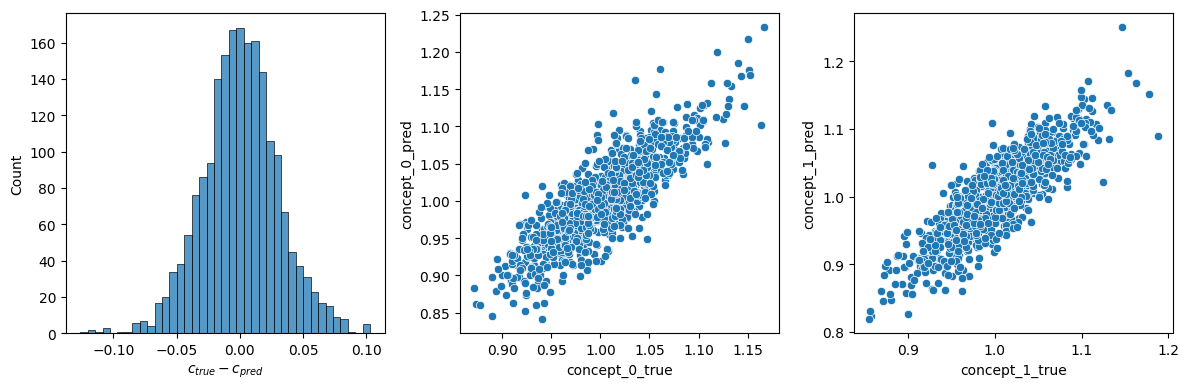

In [24]:
n_cols = 1 + len(C_true)
fig,ax = plt.subplots(1,n_cols, figsize = (4 * n_cols,4))
sns.histplot((C_true.values.flatten() - C_pred.values.flatten()), ax = ax[0])
ax[0].set_xlabel(r'$c_{true} - c_{pred}$')

for ii in range(C_true.shape[0]):
    sns.scatterplot(df.T,x = f'concept_{ii}_true',y= f'concept_{ii}_pred', ax = ax[ii+1],)

fig.tight_layout()

In other words, if you activte a concept $c_k$ in a population of cells, you should have, on average, an $\exp(c_{kj})$ fold change in expression in gene $j$ for those cells.

In [25]:
del dataset

### Modifying the concepts

Currently four types of modifications to the concepts are supported:
- Drop concepts
- Add concepts (that have no signal)
- Add noise to concepts (randomly flip a set number)
- Duplicate concepts

Here are examples of each one of them

In [26]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = 25,
                                                         n_vars = 50,
                                                         n_tissues=n_tissues,
                                                         n_celltypes=n_celltypes,
                                                         n_batches = n_batches,
                                                         n_concepts = n_concepts,
                                                        )
                                                         

In [27]:
dataset

<xarray.Dataset> Size: 27kB
Dimensions:                (obs: 25, var: 50, concept: 8, tissue: 3, batch: 2,
                            celltype: 10)
Coordinates:
  * obs                    (obs) <U6 600B 'obs_0' 'obs_1' ... 'obs_23' 'obs_24'
  * var                    (var) <U6 1kB 'var_0' 'var_1' ... 'var_48' 'var_49'
  * concept                (concept) <U9 288B 'concept_0' ... 'concept_7'
  * tissue                 (tissue) <U8 96B 'tissue_0' 'tissue_1' 'tissue_2'
  * celltype               (celltype) <U10 400B 'celltype_0' ... 'celltype_9'
  * batch                  (batch) <U7 56B 'batch_0' 'batch_1'
Data variables: (12/15)
    data                   (obs, var) float64 10kB 4.0 2.0 3.0 ... 2.0 1.0 7.0
    concepts               (obs, concept) float64 2kB 0.0 1.0 0.0 ... 0.0 0.0
    concept_coef           (concept, var) float64 3kB -0.0 0.0 -0.0 ... 0.0 0.0
    tissues                (obs) <U8 800B 'tissue_0' 'tissue_0' ... 'tissue_0'
    tissue_coef            (tissue, var) float64 1kB 0.07415 0.07181 ... 0.02351
    batches                (obs) <U7 700B 'batch_1' 'batch_1' ... 'batch_0'
    ...                     ...
    std_libsize            (batch) float64 16B 0.01621 0.02555
    p_batch                (batch) float64 16B 0.5072 0.4928
    p_tissue               (tissue) float64 24B 0.8669 0.1017 0.03142
    p_celltype_in_tissue   (tissue, celltype) float64 240B 0.125 ... 0.09462
    p_concept_in_celltype  (celltype, concept) float64 640B 3.688e-06 ... 0.564
    baseline               (var) float64 400B 1.136 0.4857 1.453 ... 0.3313 1.57

Drop concept

In [28]:
new_concepts,indicator = clab.datagen.modify.drop_concepts(dataset,n_drop = 3)

The first return object is the new concept indicator, the second object is an indicator telling you which concepts were dropped

In [29]:
indicator

array(['dropped', 'original', 'original', 'original', 'dropped',
       'original', 'dropped', 'original'], dtype='<U64')

Visualize the old and new concepts

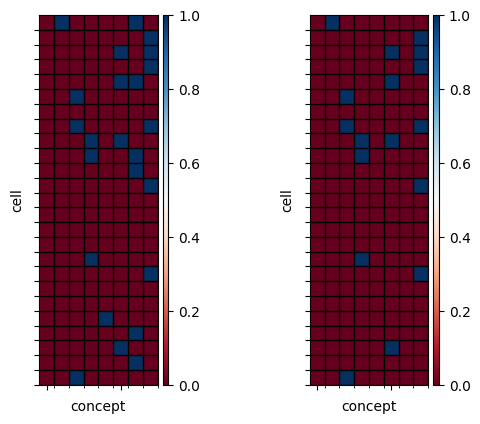

Concepts Dropped : 0, 4, 6


In [30]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1])
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'dropped'])
print('Concepts Dropped : {}'.format(string))

Add concepts:

In [31]:
new_concepts,indicator = clab.datagen.modify.add_concepts(dataset,n_add = 2, p_active = [0.9, 0.2])

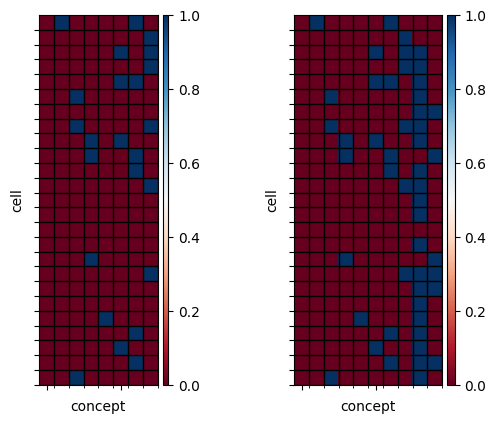

Concepts Added : 8, 9


In [32]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'added'])
print('Concepts Added : {}'.format(string))

Add noise to concepts

In [33]:
new_concepts,indicator = clab.datagen.modify.add_noise(dataset,n_modified= 4, p_noise=0.2)

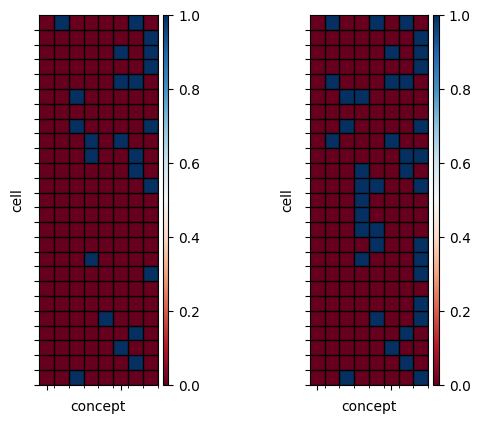

Concepts with noise : 1, 3, 4, 7


In [34]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s == 'noisy'])
print('Concepts with noise : {}'.format(string))

Duplicate concepts

In [35]:
new_concepts,indicator = clab.datagen.modify.add_duplicate(dataset,n_duplicate= 2, n_replica=3)

The duplication indicator tells you which concepts are duplicates as well as well as which concepts that belong together

In [36]:
indicator

array(['original', 'original', 'original', 'duplicate_3', 'original',
       'original', 'original', 'duplicate_7', 'duplicate_3',
       'duplicate_3', 'duplicate_3', 'duplicate_7', 'duplicate_7',
       'duplicate_7'], dtype='<U64')

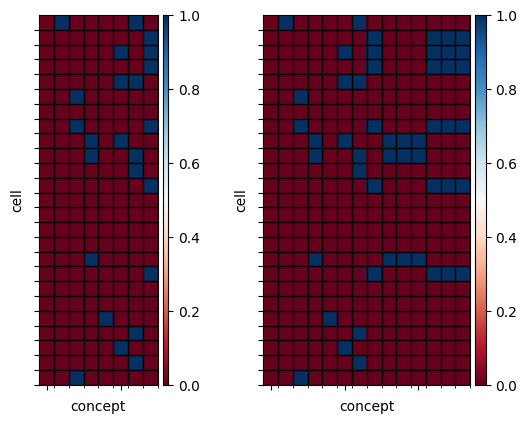

Concepts with redundancy : 3, 7, 8, 9, 10, 11, 12, 13


In [37]:
fig,ax = plt.subplots(1,2)
clab.datagen.plot.matrix_plot(dataset.concepts.to_numpy(), xlabel='concept', ylabel = 'cell', ax=ax[0],show =False)
clab.datagen.plot.matrix_plot(new_concepts, xlabel='concept', ylabel = 'cell', ax=ax[1],)
string = ', '.join([str(k) for k,s in enumerate(indicator) if s.startswith('dup')])
print('Concepts with redundancy : {}'.format(string))